In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from utils import get_classifier, get_binetflow_files, get_saved_data, get_feature_labels, get_feature_order
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier


In [2]:
def plot_rf_on(xtrain, xtest, ytrain, ytest, title="Scores"):
    estimators = [16, 50, 100, 300, 500, 1000]
    f1 = []
    prec = []
    rec = []
    for estimator in estimators:
        rf = RandomForestClassifier(n_estimators=estimator, criterion='entropy')
        rf.fit(xtrain, ytrain)
        predicted = rf.predict(xtest)
        f1.append(f1_score(ytest, predicted))
        prec.append(precision_score(ytest, predicted))
        rec.append(recall_score(ytest, predicted))
    plt.figure()
    plt.plot(estimators, f1, color='lightblue', label='f1_score')
    plt.plot(estimators, prec, color='red', label='precision')
    plt.plot(estimators, rec, color='green', label='recall')
    plt.xlabel('N estimators')
    plt.ylabel('Score')
    plt.title(title)
    plt.show()
    
    
def rf_feature_importance(bfile):
    rf = get_classifier('rf')
    feature, label = get_feature_labels(get_saved_data(0.15, bfile))
    xtrain, xtest, ytrain, ytest = train_test_split(feature, label, test_size=0.3, random_state=42)
    
    rf.fit(feature, label)

    importances = rf.feature_importances_
    std = np.std([t.feature_importances_ for t in rf.estimators_], axis=0)
    indices = np.argsort(importances)[::-1]
    
    rf.fit(xtrain, ytrain)
    predicted = rf.predict(xtest)
    
    print("F1_score: {0:.4f}, Precision: {1:.4f}, Recall: {2:.4f}".format(
        f1_score(ytest, predicted), precision_score(ytest, predicted), 
        recall_score(ytest, predicted)))

    plt.figure()
    plt.title("Feature importance")
    plt.bar(range(feature.shape[1]), importances[indices],
           color="r", yerr=std[indices], align="center")
    plt.xticks(range(feature.shape[1]), indices)
    plt.xlim([-1, feature.shape[1]])
    plt.title(bfile)
    plt.show()


In [3]:
binet_files = get_binetflow_files()


In [4]:
# fit classifier
rf = get_classifier('rf')
feature, label = get_feature_labels(get_saved_data(0.15, binet_files[-1]))
rf.fit(feature, label)


saved_data/saved_0.15s_15-3.pk1


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=2,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [5]:
importances = rf.feature_importances_
std = np.std([t.feature_importances_ for t in rf.estimators_], axis=0)

indices = np.argsort(importances)[::-1]
orders = get_feature_order()
xtick = []


['background_flow_count', 'n_conn', 'normal_flow_count', 'n_tcp', 'n_s_b_p_address', 'avg_duration', 'n_dports<1024', 'n_d_b_p_address', 'n_sports>1024', 'n_udp', 'n_dports>1024', 'n_s_a_p_address', 'n_d_c_p_address', 'n_d_a_p_address', 'n_s_c_p_address', 'n_icmp', 'n_sports<1024', 'n_d_na_p_address', 'n_s_na_p_address']


/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


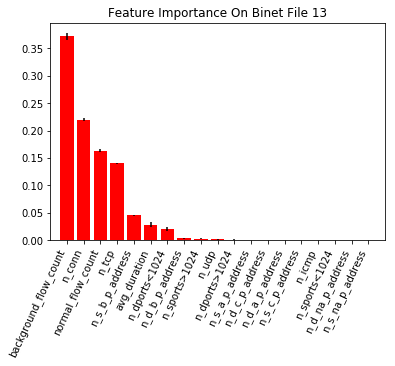

In [6]:
for i in indices:
    xtick.append(orders[i])

fig, ax = plt.subplots()
print(xtick)
plt.setp(ax.get_xticklabels(), rotation=65, horizontalalignment='right')
ax.bar(range(feature.shape[1]), importances[indices], color="r", yerr=std[indices], align="center")
ax.set_title("Feature Importance On Binet File 13")
ax.set_xticks(np.arange(len(xtick)))
ax.set_xticklabels(xtick)
ax.set_xlim([-1, feature.shape[1]])
fig.show()


In [7]:
print("Key")
for i in indices:
    print(i, orders[i])


Key
1 background_flow_count
7 n_conn
15 normal_flow_count
18 n_tcp
4 n_s_b_p_address
3 avg_duration
16 n_dports<1024
17 n_d_b_p_address
6 n_sports>1024
9 n_udp
0 n_dports>1024
2 n_s_a_p_address
14 n_d_c_p_address
12 n_d_a_p_address
13 n_s_c_p_address
10 n_icmp
5 n_sports<1024
11 n_d_na_p_address
8 n_s_na_p_address


In [8]:
feature, label = get_feature_labels(get_saved_data(0.15, binet_files[-1]))
rf.fit(feature, label)


saved_data/saved_0.15s_15-3.pk1


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=2,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [9]:
importances = rf.feature_importances_
std = np.std([t.feature_importances_ for t in rf.estimators_], axis=0)
indices = np.argsort(importances)[::-1]


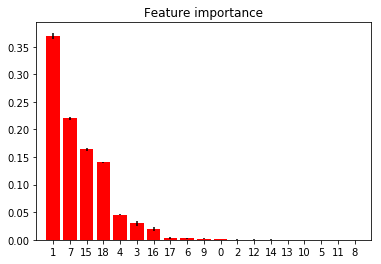

In [10]:
plt.figure()
plt.title("Feature importance")
plt.bar(range(feature.shape[1]), importances[indices], color="r", yerr=std[indices], align="center")
plt.xticks(range(feature.shape[1]), indices)
plt.xlim([-1, feature.shape[1]])
plt.show()


0 n_dports>1024
1 background_flow_count
2 n_s_a_p_address
3 avg_duration
4 n_s_b_p_address
5 n_sports<1024
6 n_sports>1024
7 n_conn
8 n_s_na_p_address
9 n_udp
10 n_icmp
11 n_d_na_p_address
12 n_d_a_p_address
13 n_s_c_p_address
14 n_d_c_p_address
15 normal_flow_count
16 n_dports<1024
17 n_d_b_p_address
18 n_tcp
saved_data/saved_0.15s_10.pk1
F1_score: 0.9509, Precision: 0.9896, Recall: 0.9152


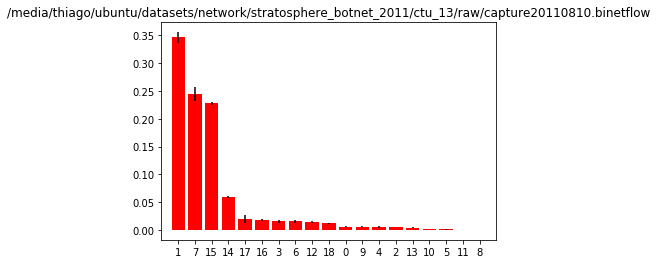

saved_data/saved_0.15s_11.pk1
F1_score: 0.9471, Precision: 0.9865, Recall: 0.9107


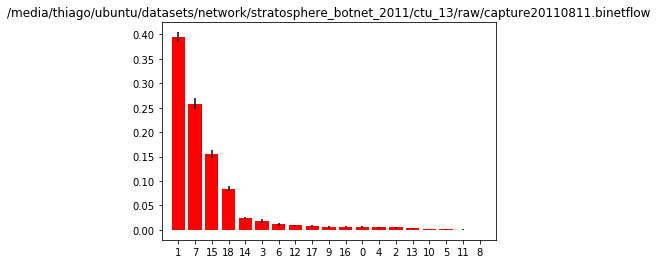

saved_data/saved_0.15s_12.pk1
F1_score: 0.9762, Precision: 0.9947, Recall: 0.9583


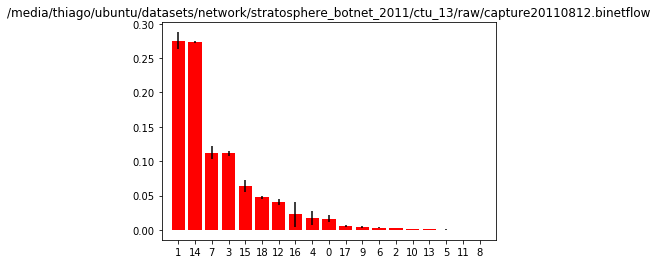

saved_data/saved_0.15s_15.pk1
F1_score: 0.7312, Precision: 0.9963, Recall: 0.5776


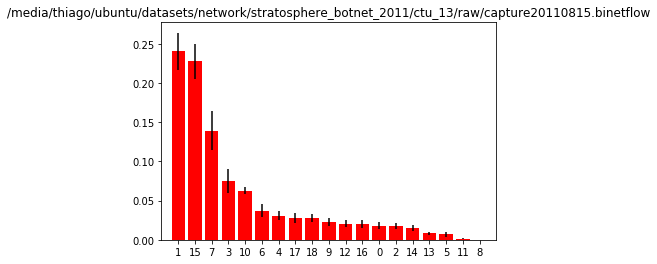

saved_data/saved_0.15s_15-2.pk1
F1_score: 0.7147, Precision: 0.9789, Recall: 0.5628


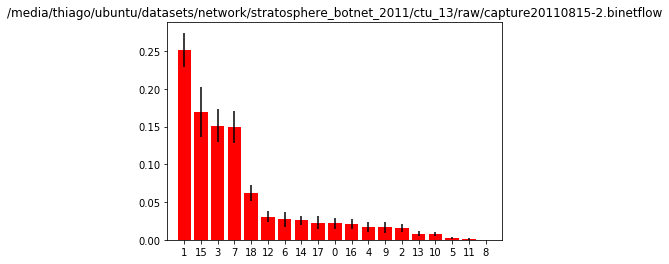

saved_data/saved_0.15s_16.pk1
F1_score: 0.7441, Precision: 0.9937, Recall: 0.5947


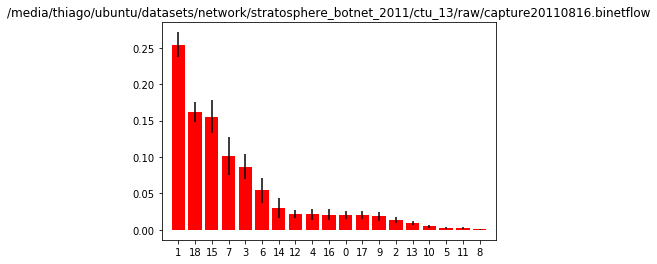

saved_data/saved_0.15s_16-2.pk1


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


F1_score: 0.0000, Precision: 0.0000, Recall: 0.0000


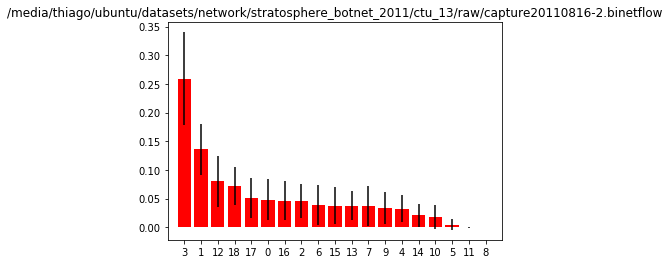

saved_data/saved_0.15s_16-3.pk1
F1_score: 0.8949, Precision: 0.9972, Recall: 0.8116


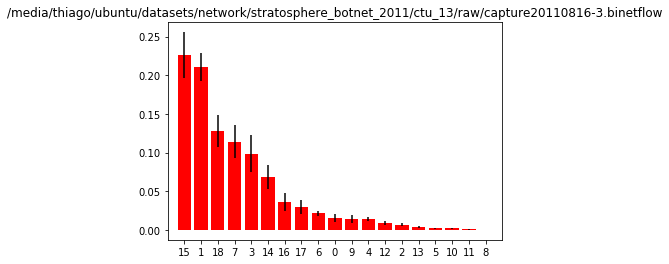

saved_data/saved_0.15s_17.pk1
F1_score: 0.9790, Precision: 0.9825, Recall: 0.9756


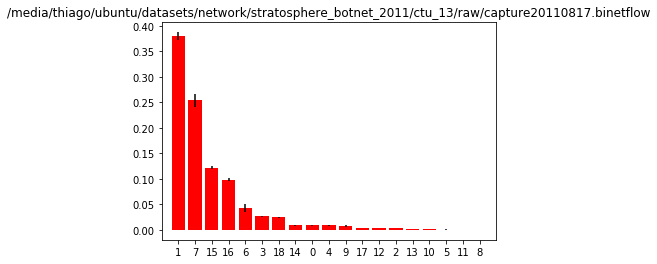

saved_data/saved_0.15s_18.pk1
F1_score: 0.9013, Precision: 0.9642, Recall: 0.8462


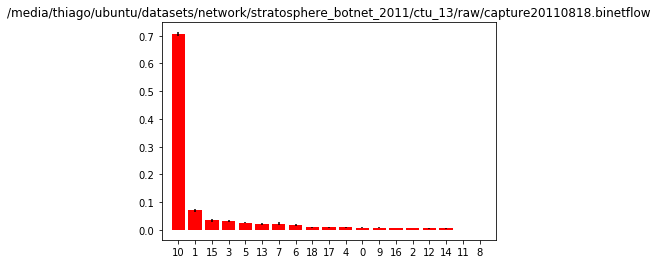

saved_data/saved_0.15s_18-2.pk1
F1_score: 0.8470, Precision: 0.9444, Recall: 0.7677


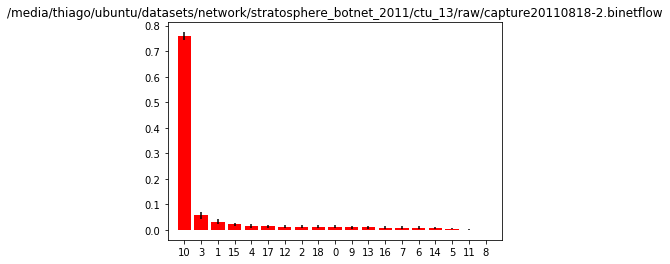

saved_data/saved_0.15s_19.pk1
F1_score: 0.7900, Precision: 0.9948, Recall: 0.6552


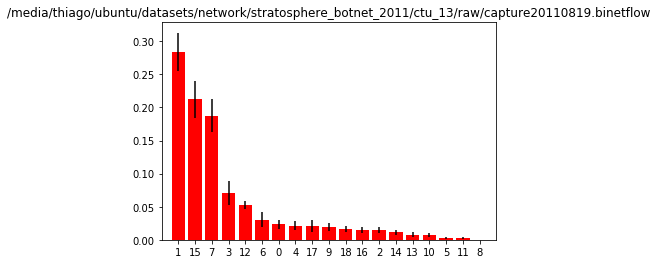

saved_data/saved_0.15s_15-3.pk1
F1_score: 0.9918, Precision: 0.9975, Recall: 0.9863


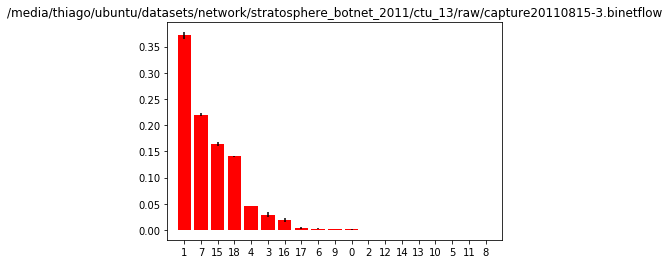

In [11]:
for i, o in enumerate(get_feature_order()):
    print(i, o)

for b in binet_files:
    rf_feature_importance(b)


saved_data/saved_0.15s_17.pk1
saved_data/saved_0.15s_18.pk1
saved_data/saved_0.15s_15-3.pk1


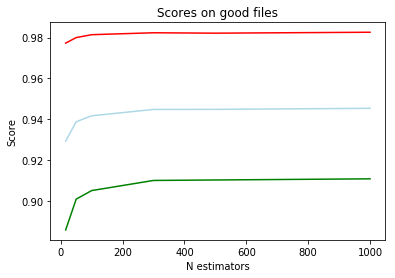

In [12]:
best = [8, 9, 12]
summaries = []
for i in best:
    summaries += get_saved_data(0.15, binet_files[i])
feature, label = get_feature_labels(summaries)
del summaries
xtrain, xtest, ytrain, ytest = train_test_split(feature, label, test_size=0.3, random_state=42)
plot_rf_on(xtrain, xtest, ytrain, ytest, title="Scores on good files")


saved_data/saved_0.15s_10.pk1


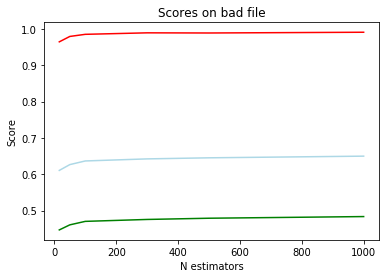

In [13]:
feature, label = get_feature_labels(get_saved_data(0.15, binet_files[0]))
xtrain, xtest, ytrain, ytest = train_test_split(feature, label, test_size=0.3, random_state=42)
plot_rf_on(xtrain, xtest, ytrain, ytest, title='Scores on bad file')
